Jupyter Notebooks have a fairly elegant architecture, with a number of related projects working together to provide an executable notebook.

Here we'll focus on how the [iJavaScript Kernel](https://github.com/n-riesco/ijavascript) interacts with Jupyter.  However, there are resources provided throughout for learning more.

---

# Available as Notebook

Please note that this is also [available as a Jupyter Notebook](notebooks/ex_Setup_JupyterArchitect.ipynb), which is how many of the diagrams created where generated (using [PlantUML](https://plantuml.com/) through the [jupyter-ijavascript-utils library](https://jupyter-ijavascript-utils.onrender.com/module-plantuml.html))

For example [using homebrew](https://formulae.brew.sh/formula/plantuml) or [simply running from the jar file](https://plantuml.com/starting)

## PlantUML PicoWeb

If you wish to run this yourself, please note you'll need to run or specify a PlantUML Server - but this is quite easy through [PlantUML PicoWeb](https://plantuml.com/picoweb))
                                                                 
This can be as easy as running the following in another tab:

```
# ex - like through homebrew
plantuml -picoweb

# ex - like through the jar
java -jar plantuml.jar -picoweb
```

Some diagrams (such as Class and Object) may depend on [graphviz](https://plantuml.com/graphviz-dot), but bypassed if using the `layout smetana`)

Please [see this document on PlantUML and GraphViz for more, including how to install](https://plantuml.com/graphviz-dot)

In [3]:
utils = require('jupyter-ijavascript-utils');
['utils']

[ 'utils' ]

# Jupyter History

[Project Jupyter](https://jupyter.org/) is a community with the goal to 'develop open-source software, open-standards, and services for interactive computing across dozens of programming languages'

Originally, it was a spin-off project from [IPython](https://en.wikipedia.org/wiki/IPython) and a reference to:

* the three core languages supported: Julia, Python and R
* but also a homage to Galileo's notebooks in discovering the moons of jupyter.

# Kernel Architecture

The [Jupyter Kernels](https://docs.jupyter.org/en/latest/projects/kernels.html#kernels-langs) are a language specific process that run independently from Jupyter and interact through messaging to the Jupyter Applications and interfaces.

There are two types of Kernels:

* Native Kernels
   * Manage Language Execution, and provide a response
   * Manage Notebook JSON
   * Process ØMQ Messaging
* Wrapper Kernels
   * Manage Language Execution, and provide a response
   * Rely on IPython's API to
      * Manage IPython JSON
      * Manage ØMQ Messaging to cells

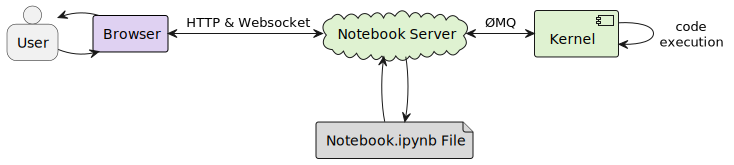

In [38]:
utils.plantuml.render(`
@startuml

<style>
rectangle {
  BackGroundColor #dfd1f2
  LineThickness 1
  LineColor black
}
cloud {
    BackGroundColor #dff2d1
    LineThickness 1
}
component {
    BackGroundColor #dff2d1
    LineThickness 1
}
file {
    BackGroundColor #d9d9d9
    LineThickness 1
}
</style>

Person User
rectangle Browser
cloud "Notebook Server" as Server
component Kernel
file "Notebook.ipynb File" as Notebook

User -ri-> Browser
Browser -le-> User

Browser <-ri-> Server : HTTP & Websocket

Server <-ri-> Kernel: "ØMQ"

Kernel -> Kernel : "code\\nexecution"

Notebook -up-> Server
Server -do-> Notebook


@enduml
`)

Wrapper Kernels are much easier to write, as they implement only the core Language Execution

Each Kernel provides a running instance of node (and variables), that can then be accessed by subsequent cells.

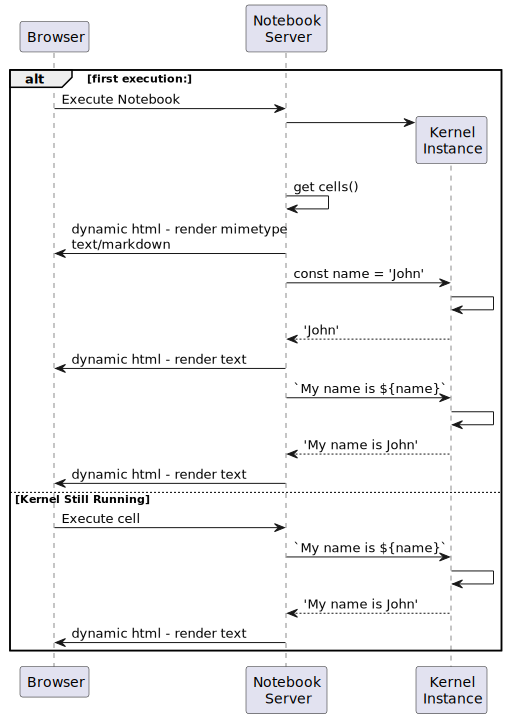

In [85]:
utils.plantuml.render(`
participant Browser as browser
participant "Notebook\\nServer" as server
participant "Kernel\\nInstance" as kernel


alt first execution:
    browser -> server: Execute Notebook

    server -> kernel **

    server -> server: get cells()

    server -> browser: dynamic html - render mimetype\\ntext/markdown

    server -> kernel : const name = 'John'
    kernel -> kernel :
    kernel --> server: 'John'
    server -> browser: dynamic html - render text

    server -> kernel : \`My name is \${name}\`
    kernel -> kernel :
    kernel --> server: 'My name is John'
    server -> browser: dynamic html - render text

else Kernel Still Running
    browser -> server: Execute cell

    server -> kernel : \`My name is \${name}\`
    kernel -> kernel :
    kernel --> server: 'My name is John'
    server -> browser: dynamic html - render text

end alt

`)

## Kernel Management

Within Jupyter, we have a list of Kernels that are currently 'running' (active) - each providing a running instance that the code is executing within.

![screenshot of jupyter lab kernel management](../img/architecture_kernelManagement.png)

When a document is initially run (and there is no running instance for that document), then one is instantiated.

Jupyter Lab is managing those instances, and they can be killed at will.

Although there are some advanced topics for exceptions, generally each document has their own kernel instance

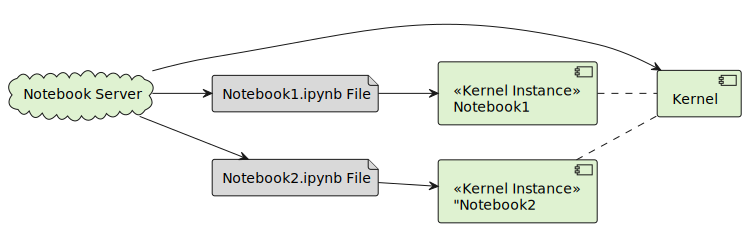

In [83]:
utils.plantuml.render(`
@startuml
left to right direction

<style>
rectangle {
  BackGroundColor #dfd1f2
  LineThickness 1
  LineColor black
}
cloud {
    BackGroundColor #dff2d1
    LineThickness 1
}
component {
    BackGroundColor #dff2d1
    LineThickness 1
}
file {
    BackGroundColor #d9d9d9
    LineThickness 1
}
</style>

cloud "Notebook Server" as Server
component Kernel
component "<<Kernel Instance>>\\nNotebook1" as Notebook1Kernel
component "<<Kernel Instance>>\\n"Notebook2" as Notebook2Kernel
file "Notebook1.ipynb File" as Notebook1
file "Notebook2.ipynb File" as Notebook2

Server -do-> Notebook1
Server -do-> Notebook2
Server -do-> Kernel

Notebook1 -do-> Notebook1Kernel
Notebook2 -do-> Notebook2Kernel

Notebook1Kernel .. Kernel
Notebook2Kernel .. Kernel

@enduml
`)

# Mime Types

The [iJavaScript Kernel](http://n-riesco.github.io/ijavascript/doc/custom.ipynb.html) - and Jupyter Lab in general, supports rendering results in multiple types of formats:

* \$\$.text - renders out results as Plain Text
* \$\$.html - renders out results as HTML
* \$\$.svg -  renders out results as SVG
* \$\$.png -  renders out results as PNG
* \$\$.jpeg - renders out results as JPEG
* \$\$.mime - lets you specify the mime type the results should be shown

See the [docs](http://n-riesco.github.io/ijavascript/doc/custom.ipynb.html) for more.

This can be quite helpful, as NPM Modules can generate the SVG Code, and then render them using one of those mime types.

![Screenshot generating SVG from Vega-Lite](../img/vegaObjectSchema.png)

## Dynamic HTML

Note that this is not like a typical webpage, where the entire document must be executed.

Note that with the page as multiple cells, we have control over the order that the cells are executed.

We can pick and choose one specific cell, all cells after a specific point, etc.

The results are then injected into the DOM through dynamic html / javascript directly underneath the 'cell contents' - as 'cell results'

![screenshot of jupyter running](../img/architecture_exampleExecution.png)

----

# HTML Script

This brings us to the [HTML Script](https://jupyter-ijavascript-utils.onrender.com/module-ijs.html#.htmlScript) concept of Browser - Server division of labor.

(Yes I know the name is irritating :) - we are welcome to suggestions)

Normally, Jupyter Lab manages replacing the 'cell results' with the response from the Kernel.

**Although it was not always the case, it appears that the response from the server can only be returned once per execution.**

*(Slight Note: `console.log()` requests can be called multiple times, and appended in real time)*

This means that Animations are typically impossible, because the server can only dynamically update the html results once.

**We CAN do animations though with HTML Script calls**

In this case, we are returning back html, that also has JavaScript executed on the client side upon render.

We can also leverage a number of other techniques to serialize NodeJS functions, code and data - and pass them to the browser (client side).

The [utils.ijs.htmlScript()](https://jupyter-ijavascript-utils.onrender.com/module-ijs.html#.htmlScript) method generates html that is then executed on the client once the dynamic html is rendered.  (Such as loading scripts from a CDN, and the NodeJS script that will be converted and passed to the client to run when all dependencies have been loaded)

![Screenshot](../img/htmlScript_qrCode.png)

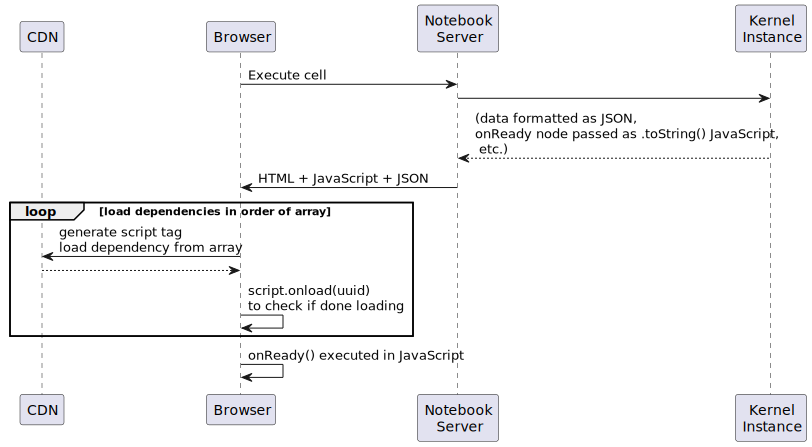

In [98]:
utils.plantuml.render(`

participant "CDN" as cdn
participant Browser as browser
participant "Notebook\\nServer" as server
participant "Kernel\\nInstance" as kernel

browser -> server: Execute cell

server -> kernel:
kernel --> server: (data formatted as JSON,\\nonReady node passed as .toString() JavaScript,\\n etc.)

server -> browser: HTML + JavaScript + JSON

loop load dependencies in order of array
    browser -> cdn: generate script tag\\nload dependency from array
    cdn --> browser:
    browser -> browser: script.onload(uuid)\\nto check if done loading
end loop

browser -> browser: onReady() executed in JavaScript
`)

HTMLScript takes care of writing the HTML code to be run on the client and simply rendered with the HTML mime type.

At this point it is very similar to developing an html page, but one that can be leveraged again and again in its own isolated environment.

(Note: we are still working on leveraging ShadowRoots for the results - see [Issue #2](https://github.com/paulroth3d/jupyter-ijavascript-utils/issues/2))

![Screenshot of leaflet using htmlScript](../img/htmlScript_leaflet.png)

(See [the jupyter-ijavascript-utils leaflet module for more](https://jupyter-ijavascript-utils.onrender.com/module-leaflet.html))

---

# Asynchronous Requests

Please note that the use of Asynchronous Requests is very common.

The [utils.ijs.await](https://jupyter-ijavascript-utils.onrender.com/module-ijs.html#.await) was intended to simplify the use of await until it has full support in the kernel.

Await allows for synchronous coding when working with asynchronous promises.
                      
[To leverage await in Javascript](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Statements/async_function), it requires:

* an `async function` that then contains the `await` commands
* a promise that we would then await on
* a top level call to that async function

For example:

```
//-- provides a promise
function resolveAfter2Seconds(x) {
  return new Promise(resolve => {
    setTimeout(() => {
      resolve(x);
    }, 2000);
  });
}

//-- async method
async function f1() {
  //-- capture the promise
  const promiseToResolve = resolveAfter2Seconds(10);
  
  //-- await on the promise
  var x = await promiseToResolve;
  
  //-- synchronous call that will ONLY be executed 2 seconds after the previous line
  console.log(x); // 10
}

f1();
```


## iJavaScript await

The iJavaScript kernel currently only behaves asynchronously if told that it should wait until `$$.sendResult()` is called.

For example:

```

//-- tell this cell that it should not continue until sendResult is called
$$.async()

//-- provides a promise
function resolveAfter2Seconds(x) {
  return new Promise(resolve => {
    setTimeout(() => {
      resolve(x);
    }, 2000);
  });
}

//-- async method
async function f1() {
  //-- capture the promise
  const promiseToResolve = resolveAfter2Seconds(10);
  
  //-- await on the promise
  var x = await promiseToResolve;
  
  //-- synchronous call that will ONLY be executed 2 seconds after the previous line
  console.log(x); // 10

  //-- tell the jupyter it is safe to run the next cell.
  $$.sendResult(x);
}

f1();
```

Instead we can replace all this code with [utils.ijs.await](https://jupyter-ijavascript-utils.onrender.com/module-ijs.html#.await)

```
utils.ijs.await(async($$, console) => {
    console.log('before 2 seconds');
    await utils.ijs.asyncWait(2);
    console.log('after 2 seconds');
});
```

This can be very helpful for when loading in data from external sources.

```
utils.ijs.await(async($$, console) => {
    const connection = new jsforce.connection(...);
    
    accounts = await connection.query('select id from accounts limit 100');
    
    contacts = await connection.query('select id from contacts limit 100');
    
    console.log('we have ${accounts.length} accounts and ${contacts.length} contacts');
});
```

and then leverage those values asynchrnously retrieved on the following cells, even though they are synchronously written.

```
//-- still works
console.log('we have ${accounts.length} accounts and ${contacts.length} contacts');
```


For more information, please see the [utils.ijs.await function](https://jupyter-ijavascript-utils.onrender.com/module-ijs.html#.await)